In [70]:
import torch
from torchvision import transforms
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)
model.eval()

Using cache found in /Users/narger/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [71]:
from torchvision.datasets.utils import download_url
import tarfile
import os

dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

Using downloaded and verified file: ./cifar10.tgz


In [72]:
data_dir = './data/cifar10'
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())
classes = test_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [105]:
values = []

img = Image.open("../inputs/luis.png")
convert_tensor = transforms.ToTensor()
img = convert_tensor(img)

v = model.relu(model.bn1(model.conv1(img.unsqueeze(0))))
copy = v
v = model.layer1[0].bn1(model.layer1[0].conv1(v))
v = model.layer1[0].relu(v)
v = model.layer1[0].bn2(model.layer1[0].conv2(v))
v = v + copy
v = v.reshape(-1).detach().numpy()
values.append(max(v))
values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(v), max(v), 1 / (max(abs(min(v)), abs(max(v))))))

Min: -0.689258873462677
Max: 1.4399827718734741
Suggested Delta: 0.6944527528610365


## Initial Layer

In [112]:
values = []

for img, label in test_dataset:
    v = model.bn1(model.conv1((img.unsqueeze(0)))).reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -0.9530298709869385
Max: 1.091073751449585
Suggested Delta: 0.9165283269544467


## Layer 1
### Block 1

ConvBN1

In [106]:
values = []

for img, label in test_dataset:
    v = model.relu(model.bn1(model.conv1(img.unsqueeze(0))))
    v = model.layer1[0].bn1(model.layer1[0].conv1(v)).reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -0.9679462909698486
Max: 0.9597784280776978
Suggested Delta: 1.033115173154943


ConvBN2

In [107]:
values = []

for img, label in test_dataset:
    v = model.relu(model.bn1(model.conv1(img.unsqueeze(0))))
    copy = v
    v = model.layer1[0].bn1(model.layer1[0].conv1(v))
    v = model.layer1[0].relu(v)
    v = model.layer1[0].bn2(model.layer1[0].conv2(v))
    v = v + copy
    v = v.reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.1165902614593506
Max: 1.858486294746399
Suggested Delta: 0.538072302618974


### Block 2
ConvBN1

In [108]:
values = []

for img, label in test_dataset:
    v = model.relu(model.bn1(model.conv1(img.unsqueeze(0))))
    copy = v
    v = model.layer1[0].bn1(model.layer1[0].conv1(v))
    v = model.layer1[0].relu(v)
    v = model.layer1[0].bn2(model.layer1[0].conv2(v))
    v = v + copy
    v = model.layer1[1].relu(v)
    v = model.layer1[1].bn1(model.layer1[1].conv1(v)).reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.417116641998291
Max: 1.1743462085723877
Suggested Delta: 0.7056582149722619


ConvBN2

In [109]:
values = []

for img, label in test_dataset:
    v = model.relu(model.bn1(model.conv1(img.unsqueeze(0))))
    copy = v
    v = model.layer1[0].bn1(model.layer1[0].conv1(v))
    v = model.layer1[0].relu(v)
    v = model.layer1[0].bn2(model.layer1[0].conv2(v))
    v = v + copy
    v = model.layer1[1].relu(v)
    copy = v
    v = model.layer1[1].bn1(model.layer1[1].conv1(v))
    v = model.layer1[1].relu(v)
    v = model.layer1[1].bn2(model.layer1[1].conv2(v))
    v = v + copy
    v = v.reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.015285611152649
Max: 2.6954500675201416
Suggested Delta: 0.3709955573096616


## Block 3
ConvBN1

In [110]:
values = []

for img, label in test_dataset:
    v = model.relu(model.bn1(model.conv1(img.unsqueeze(0))))
    copy = v
    v = model.layer1[0].bn1(model.layer1[0].conv1(v))
    v = model.layer1[0].relu(v)
    v = model.layer1[0].bn2(model.layer1[0].conv2(v))
    v = v + copy
    v = model.layer1[1].relu(v)
    copy = v
    v = model.layer1[1].bn1(model.layer1[1].conv1(v))
    v = model.layer1[1].relu(v)
    v = model.layer1[1].bn2(model.layer1[1].conv2(v))
    v = v + copy
    v = model.layer1[2].relu(v)
    copy = v
    v = model.layer1[2].bn1(model.layer1[2].conv1(v)).reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.5498157739639282
Max: 1.2585359811782837
Suggested Delta: 0.6452379804099703


In [111]:
values = []

for img, label in test_dataset:
    v = model.relu(model.bn1(model.conv1(img.unsqueeze(0))))
    copy = v
    v = model.layer1[0].bn1(model.layer1[0].conv1(v))
    v = model.layer1[0].relu(v)
    v = model.layer1[0].bn2(model.layer1[0].conv2(v))
    v = v + copy
    v = model.layer1[1].relu(v)
    copy = v
    v = model.layer1[1].bn1(model.layer1[1].conv1(v))
    v = model.layer1[1].relu(v)
    v = model.layer1[1].bn2(model.layer1[1].conv2(v))
    v = v + copy
    v = model.layer1[2].relu(v)
    copy = v
    v = model.layer1[2].bn1(model.layer1[2].conv1(v))
    v = model.layer1[2].relu(v)
    v = model.layer1[2].bn2(model.layer1[2].conv2(v))
    v = v + copy
    v = v.reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.2994799613952637
Max: 2.2965595722198486
Suggested Delta: 0.43543394741265196


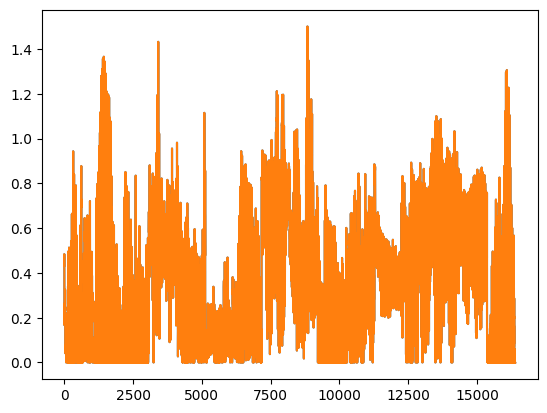

In [103]:
#Just to check previous computations were correct

v = model.relu(model.bn1(model.conv1(img.unsqueeze(0))))
copy = v
v = model.layer1[0].bn1(model.layer1[0].conv1(v))
v = model.layer1[0].relu(v)
v = model.layer1[0].bn2(model.layer1[0].conv2(v))
v = v + copy
v = model.layer1[1].relu(v)
copy = v
v = model.layer1[1].bn1(model.layer1[1].conv1(v))
v = model.layer1[1].relu(v)
v = model.layer1[1].bn2(model.layer1[1].conv2(v))
v = v + copy
v = model.layer1[2].relu(v)
copy = v
v = model.layer1[2].bn1(model.layer1[2].conv1(v))
v = model.layer1[2].relu(v)
v = model.layer1[2].bn2(model.layer1[2].conv2(v))
v = v + copy
v = torch.relu(v)

plt.plot(v.reshape(-1).detach())
plt.plot(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))).detach().reshape(-1))

## Layer 2

In [132]:
#Left branch

values = []

for img, label in test_dataset:
    v = model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0)))))
    v = model.layer2[0].bn1(model.layer2[0].conv1(v)).reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.7267122268676758
Max: 1.1909223794937134
Suggested Delta: 0.5791352979610502


In [123]:
#Left branch 2

values = []

for img, label in test_dataset:
    v = model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0)))))
    #Left
    vL = model.layer2[0].bn1(model.layer2[0].conv1(v))
    vL = model.layer2[0].relu(vL)
    vL = model.layer2[0].bn2(model.layer2[0].conv2(vL))
    #Right
    vR = model.layer2[0].downsample[1](model.layer2[0].downsample[0](v))
    
    v = vL + vR
    v = v.reshape(-1).detach().numpy()
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.6815083026885986
Max: 2.4765660762786865
Suggested Delta: 0.4037849058736241


In [126]:
values = []

for img, label in test_dataset:
    v = model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0)))))
    #Left
    vL = model.layer2[0].bn1(model.layer2[0].conv1(v))
    vL = model.layer2[0].relu(vL)
    vL = model.layer2[0].bn2(model.layer2[0].conv2(vL))
    #Right
    vR = model.layer2[0].downsample[1](model.layer2[0].downsample[0](v))
    
    v = vL + vR
    v = model.layer2[1].relu(v)
    v = model.layer2[1].bn1(model.layer2[1].conv1(v))
    
    
    v = v.reshape(-1).detach().numpy()
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.3106274604797363
Max: 1.0215675830841064
Suggested Delta: 0.7629933220184204


In [127]:
values = []

for img, label in test_dataset:
    v = model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0)))))
    #Left
    vL = model.layer2[0].bn1(model.layer2[0].conv1(v))
    vL = model.layer2[0].relu(vL)
    vL = model.layer2[0].bn2(model.layer2[0].conv2(vL))
    #Right
    vR = model.layer2[0].downsample[1](model.layer2[0].downsample[0](v))
    
    v = vL + vR
    v = model.layer2[1].relu(v)
    
    copy = v
    
    v = model.layer2[1].bn1(model.layer2[1].conv1(v))
    v = model.layer2[1].relu(v)
    v = model.layer2[1].bn2(model.layer2[1].conv2(v))
    
    v = v + copy
    
    v = v.reshape(-1).detach().numpy()
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.2168289422988892
Max: 2.7025136947631836
Suggested Delta: 0.3700258769965746


In [129]:
values = []

for img, label in test_dataset:
    v = model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0)))))
    #Left
    vL = model.layer2[0].bn1(model.layer2[0].conv1(v))
    vL = model.layer2[0].relu(vL)
    vL = model.layer2[0].bn2(model.layer2[0].conv2(vL))
    #Right
    vR = model.layer2[0].downsample[1](model.layer2[0].downsample[0](v))
    
    v = vL + vR
    v = model.layer2[1].relu(v)
    
    copy = v
    
    v = model.layer2[1].bn1(model.layer2[1].conv1(v))
    v = model.layer2[1].relu(v)
    v = model.layer2[1].bn2(model.layer2[1].conv2(v))
    
    v = v + copy
    
    v = model.layer2[2].relu(v)
    
    copy = v
    
    v = model.layer2[2].bn1(model.layer2[2].conv1(v))
    
    v = v.reshape(-1).detach().numpy()
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.562697410583496
Max: 1.5207512378692627
Suggested Delta: 0.6399191508397072


In [130]:
values = []

for img, label in test_dataset:
    v = model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0)))))
    #Left
    vL = model.layer2[0].bn1(model.layer2[0].conv1(v))
    vL = model.layer2[0].relu(vL)
    vL = model.layer2[0].bn2(model.layer2[0].conv2(vL))
    #Right
    vR = model.layer2[0].downsample[1](model.layer2[0].downsample[0](v))
    
    v = vL + vR
    v = model.layer2[1].relu(v)
    
    copy = v
    
    v = model.layer2[1].bn1(model.layer2[1].conv1(v))
    v = model.layer2[1].relu(v)
    v = model.layer2[1].bn2(model.layer2[1].conv2(v))
    
    v = v + copy
    
    v = model.layer2[2].relu(v)
    
    copy = v
    
    v = model.layer2[2].bn1(model.layer2[2].conv1(v))
    v = model.layer2[2].relu(v)
    v = model.layer2[2].bn2(model.layer2[2].conv2(v))
    
    v = v + copy
    
    v = v.reshape(-1).detach().numpy()
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.5193997621536255
Max: 3.902751922607422
Suggested Delta: 0.2562294554791742


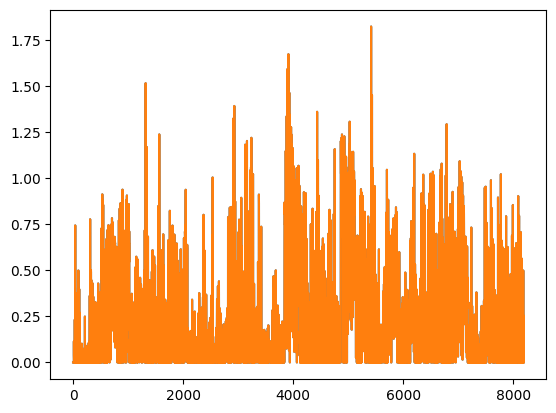

In [131]:
#Just to check previous computations were correct

v = model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0)))))
#Left
vL = model.layer2[0].bn1(model.layer2[0].conv1(v))
vL = model.layer2[0].relu(vL)
vL = model.layer2[0].bn2(model.layer2[0].conv2(vL))
#Right
vR = model.layer2[0].downsample[1](model.layer2[0].downsample[0](v))
v = vL + vR
v = model.layer2[1].relu(v)
copy = v
v = model.layer2[1].bn1(model.layer2[1].conv1(v))
v = model.layer2[1].relu(v)
v = model.layer2[1].bn2(model.layer2[1].conv2(v))
v = v + copy
v = model.layer2[2].relu(v)
copy = v
v = model.layer2[2].bn1(model.layer2[2].conv1(v))
v = model.layer2[2].relu(v)
v = model.layer2[2].bn2(model.layer2[2].conv2(v))
v = v + copy
v = model.layer2[2].relu(v)

plt.plot(v.reshape(-1).detach())
plt.plot(model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0)))))).detach().reshape(-1))

## Layer 3

In [133]:
values = []

for img, label in test_dataset:
    v = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))))
    v = model.layer3[0].bn1(model.layer3[0].conv1(v)).reshape(-1).detach().numpy()
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.3424136638641357
Max: 1.5531986951828003
Suggested Delta: 0.64383262946426


In [135]:
#Left branch 2

values = []

for img, label in test_dataset:
    v = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))))
    #Left
    vL = model.layer3[0].bn1(model.layer3[0].conv1(v))
    vL = model.layer3[0].relu(vL)
    vL = model.layer3[0].bn2(model.layer3[0].conv2(vL))
    #Right
    vR = model.layer3[0].downsample[1](model.layer3[0].downsample[0](v))
    
    v = vL + vR
    v = v.reshape(-1).detach().numpy()
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.8291257619857788
Max: 2.4968225955963135
Suggested Delta: 0.40050903166437063


In [137]:
values = []

for img, label in test_dataset:
    v = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))))
    #Left
    vL = model.layer3[0].bn1(model.layer3[0].conv1(v))
    vL = model.layer3[0].relu(vL)
    vL = model.layer3[0].bn2(model.layer3[0].conv2(vL))
    #Right
    vR = model.layer3[0].downsample[1](model.layer3[0].downsample[0](v))
    
    v = vL + vR
    v = model.layer3[1].relu(v)
    v = model.layer3[1].bn1(model.layer3[1].conv1(v))
    
    
    v = v.reshape(-1).detach().numpy()
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.7428849935531616
Max: 1.3453339338302612
Suggested Delta: 0.573761323150378


In [138]:
values = []

for img, label in test_dataset:
    v = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))))
    #Left
    vL = model.layer3[0].bn1(model.layer3[0].conv1(v))
    vL = model.layer3[0].relu(vL)
    vL = model.layer3[0].bn2(model.layer3[0].conv2(vL))
    #Right
    vR = model.layer3[0].downsample[1](model.layer3[0].downsample[0](v))
    
    v = vL + vR
    v = model.layer3[1].relu(v)
    copy = v
    
    v = model.layer3[1].bn1(model.layer3[1].conv1(v))
    v = model.layer3[1].relu(v)
    v = model.layer3[1].bn2(model.layer3[1].conv2(v))
    
    v = v + copy
    
    v = v.reshape(-1).detach().numpy()
    
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -2.104152202606201
Max: 2.9482364654541016
Suggested Delta: 0.33918581895227157


In [139]:
values = []

for img, label in test_dataset:
    v = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))))
    #Left
    vL = model.layer3[0].bn1(model.layer3[0].conv1(v))
    vL = model.layer3[0].relu(vL)
    vL = model.layer3[0].bn2(model.layer3[0].conv2(vL))
    #Right
    vR = model.layer3[0].downsample[1](model.layer3[0].downsample[0](v))
    
    v = vL + vR
    v = model.layer3[1].relu(v)
    copy = v
    
    v = model.layer3[1].bn1(model.layer3[1].conv1(v))
    v = model.layer3[1].relu(v)
    v = model.layer3[1].bn2(model.layer3[1].conv2(v))
    
    v = v + copy
    
    v = model.layer3[2].relu(v)
    
    copy = v
    
    v = model.layer3[2].bn1(model.layer3[2].conv1(v))
    
    v = v.reshape(-1).detach().numpy()
    
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -1.417157769203186
Max: 1.1955695152282715
Suggested Delta: 0.7056377361302983


In [140]:
values = []

for img, label in test_dataset:
    v = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))))
    #Left
    vL = model.layer3[0].bn1(model.layer3[0].conv1(v))
    vL = model.layer3[0].relu(vL)
    vL = model.layer3[0].bn2(model.layer3[0].conv2(vL))
    #Right
    vR = model.layer3[0].downsample[1](model.layer3[0].downsample[0](v))
    
    v = vL + vR
    v = model.layer3[1].relu(v)
    copy = v
    
    v = model.layer3[1].bn1(model.layer3[1].conv1(v))
    v = model.layer3[1].relu(v)
    v = model.layer3[1].bn2(model.layer3[1].conv2(v))
    
    v = v + copy
    
    v = model.layer3[2].relu(v)
    
    copy = v
    
    v = model.layer3[2].bn1(model.layer3[2].conv1(v))
    v = model.layer3[2].relu(v)
    v = model.layer3[2].bn2(model.layer3[2].conv2(v))
    
    v = v + copy
    
    
    v = v.reshape(-1).detach().numpy()
    
    
    values.append(max(v))
    values.append(min(v))
    
print("Min: {}\nMax: {}\nSuggested Delta: {}".format(min(values), max(values), 1 / (max(abs(min(values)), abs(max(values))))))

Min: -6.800760269165039
Max: 12.334877014160156
Suggested Delta: 0.0810709339746171


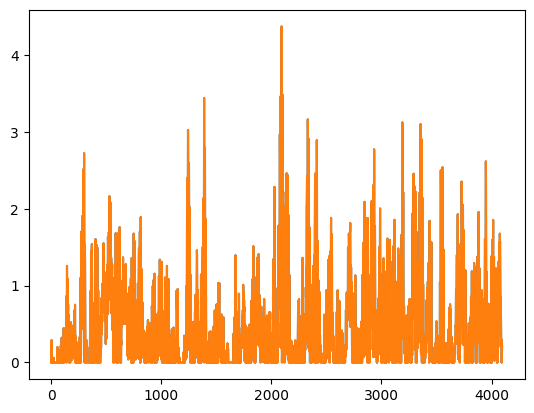

In [142]:
#Just to check previous computations were correct

v = model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))))
#Left
vL = model.layer3[0].bn1(model.layer3[0].conv1(v))
vL = model.layer3[0].relu(vL)
vL = model.layer3[0].bn2(model.layer3[0].conv2(vL))
#Right
vR = model.layer3[0].downsample[1](model.layer3[0].downsample[0](v))
v = vL + vR
v = model.layer3[1].relu(v)
copy = v
v = model.layer3[1].bn1(model.layer3[1].conv1(v))
v = model.layer3[1].relu(v)
v = model.layer3[1].bn2(model.layer3[1].conv2(v))
v = v + copy
v = model.layer3[2].relu(v)
copy = v
v = model.layer3[2].bn1(model.layer3[2].conv1(v))
v = model.layer3[2].relu(v)
v = model.layer3[2].bn2(model.layer3[2].conv2(v))
v = v + copy
v = model.layer3[2].relu(v)

plt.plot(v.reshape(-1).detach())
plt.plot(model.layer3(model.layer2(model.layer1(model.relu(model.bn1(model.conv1(img.unsqueeze(0))))))).detach().reshape(-1))

## Final Layer

No ReLUs in here